**<span style="color:#023e8a;">Name: MAHFUZATUL BUSHRA</span>**

**<span style="color:#023e8a;">Student ID: 22-92354-1</span>**

Here I have designed a network that combines supervised and unsupervised architectures in one model to achieve a classification on CIFAR-10 datasets. So, for this I build a encoder model and this model compressed the image data and after decoder model decompressed the data and again this model reconstruct the original image. 

Another part of this notebook is to used the Pre-Training CNNs Using Convolutional Autoencoders to classify the image.


**<span style="color:#023e8a;">Import some necessary library.</span>**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


### **<span style="color:#023e8a;">Load the Datasets</span>**

The **CIFAR10** dataset contains 60,000, 32×32 pixel color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

The class labels and their standard associated integer values are listed below.

* `0 --> **airplane**`
* `1 --> **automobile**`
* `2 --> **bird**`
* `3 --> **cat**`
* `4 --> **deer**`
* `5 --> **dog**`
* `6 --> **frog**`
* `7 --> **horse**`
* `8 --> **ship**`
* `9 --> **truck**`

### **<span style="color:#023e8a;">Spliting Datasets into four parts 👀</span>**
* `1. X_train`
* `2. X_test`
* `3. Y_train`
* `4. Y_test`

In [3]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
num_classes = 10

In [5]:
print('train image shape:',X_train.shape,'test image shape:',X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

train image shape: (50000, 32, 32, 3) test image shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


### **<span style="color:#023e8a;">Here we see there are 50000 training images and 1000 test images</span>**

In [6]:
print('Training class shape:',Y_train.shape,'Testing class shape:',Y_test.shape)

Training class shape: (50000, 1) Testing class shape: (10000, 1)


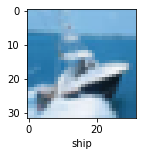

In [7]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[8])
plt.xlabel(classes[8])
plt.show()

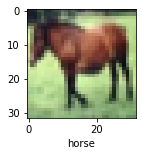

In [8]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[7])
plt.xlabel(classes[7])
plt.show()

* ##### It is clear that the images are indeed very small compared to modern photographs; it can be challenging to see what exactly is represented in some of the images given the extremely low resolution.This low resolution is likely the cause of the limited performance that top-of-the-line algorithms are able to achieve on the dataset.

In [9]:
X_train.max()

255

* ##### The max pixel value is 255 for each channel. Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### **<span style="color:#023e8a;">Normalizing the training data</span>**

In [10]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [11]:
y_train = Y_train.reshape(-1,)
y_test = Y_test.reshape(-1,)
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
#one-hot encoding
total_classes=10
y_train_en = to_categorical(y_train, total_classes)
y_test_en = to_categorical(y_test, total_classes)

* ##### Y_train,y_test is a 2D array, for our classification having 1D array is good enough. so I will convert this to now 1D array. We also know that there are 10 classes and that classes are represented as unique integers.



### **<span style="color:#023e8a;">Taking 50% of ["bird","deer","truck"] class in the training data.</span>**

In [13]:
model = models.Sequential()

#Input Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3))) # Number of Neuron  =  32
model.add(layers.MaxPool2D((2, 2)))


#1st Hidden Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Number of Neuron  =  64
model.add(layers.MaxPool2D((2, 2)))


#2nd Hidden Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Number of Neuron  =  128
model.add(layers.MaxPool2D((2, 2)))

#bridge Layer
model.add(layers.Flatten())


#Output Layer
model.add(layers.Dense(512, activation = 'relu')) # Number of Neuron  =  512
model.add(layers.Dense(10, activation = 'softmax'))

2022-03-10 02:47:40.595326: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-10 02:47:40.595652: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
from keras.callbacks import EarlyStopping
#To avoid overfitting early stopping is used
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 2,
                          verbose = 1,
                          restore_best_weights = True)
callbacks = [earlystop]

In [15]:
model.compile(optimizer = 'Nadam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history=model.fit(X_train, y_train_en, batch_size=128, epochs=20, validation_data=(X_test, y_test_en),callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 35s 703us/sample - loss: 1.6246 - accuracy: 0.4087 - val_loss: 1.3242 - val_accuracy: 0.5314
Epoch 2/20
50000/50000 [==============================] - 34s 671us/sample - loss: 1.2031 - accuracy: 0.5733 - val_loss: 1.1329 - val_accuracy: 0.5944
Epoch 3/20
50000/50000 [==============================] - 34s 670us/sample - loss: 1.0121 - accuracy: 0.6476 - val_loss: 1.0644 - val_accuracy: 0.6196
Epoch 4/20
50000/50000 [==============================] - 34s 670us/sample - loss: 0.8759 - accuracy: 0.6955 - val_loss: 0.9031 - val_accuracy: 0.6853
Epoch 5/20
50000/50000 [==============================] - 33s 665us/sample - loss: 0.7733 - accuracy: 0.7318 - val_loss: 0.9261 - val_accuracy: 0.6806
Epoch 6/20
50000/50000 [==============================] - 33s 666us/sample - loss: 0.6812 - accuracy: 0.7641 - val_loss: 0.9228 - val_accuracy: 0.6824
Epoch 00006: early stopping


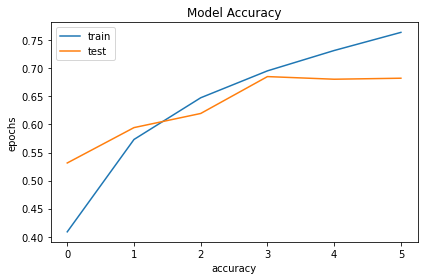

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

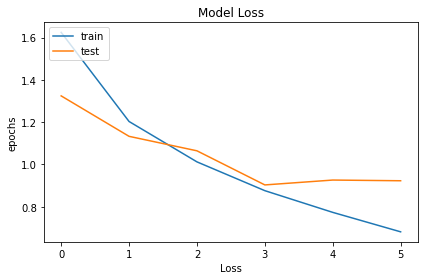

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()